<a href="https://colab.research.google.com/github/praveenwork/ml/blob/main/Practice/TransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

import tensorflow as tf
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications.inception_v3 import InceptionV3




# Download the pre trained models

!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
  -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

local_weight_file = "/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"


# Define Pre trained model
pre_trained_model = InceptionV3(input_shape = (150,150, 3),
                                include_top = False,
                                weights = None)

pre_trained_model.load_weights(local_weight_file)

for layer in pre_trained_model.layers:
  layer.trainable = False

last_layer = pre_trained_model.get_layer("mixed7")
print("Last output shape: ", last_layer.output_shape)
last_out = last_layer.output


x = tf.keras.layers.Flatten()(last_out)
x = tf.keras.layers.Dense(512, activation=tf.nn.relu)(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(1, activation = tf.nn.sigmoid)(x)


# Define Model
model = tf.keras.Model(pre_trained_model.input, x)

# Complile 
model.compile(optimizer = tf.keras.optimizers.RMSprop(lr = 0.01), loss = "binary_crossentropy", metrics = ['accuracy'])

#download cats and dogs.

!wget --no-check-certificate \
        https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
       -O /tmp/cats_and_dogs_filtered.zip



#unzip the file
zip_ref = zipfile.ZipFile("/tmp/cats_and_dogs_filtered.zip")
zip_ref.extractall("/tmp")
zip_ref.close()


#Train Data gen
tain_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.2,
    shear_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

train_generator = tain_datagen.flow_from_directory(
    "/tmp/cats_and_dogs_filtered/train",
    target_size = (150,150),
    batch_size = 20,
    class_mode = "binary"
)


validation_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = validation_datagen.flow_from_directory(
    "/tmp/cats_and_dogs_filtered/validation",
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

history = model.fit(
    train_generator,
    steps_per_epoch = 100,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 50,
    verbose = 1
)





--2021-02-11 12:39:10--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.7.144, 172.217.7.176, 172.217.12.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.7.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   197MB/s    in 0.4s    

2021-02-11 12:39:10 (197 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]

Last output shape:  (None, 7, 7, 768)
--2021-02-11 12:39:18--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.31.128, 172.217.164.144, 142.250.73.208, ...
Connecting to storage.googleapis.com (storage

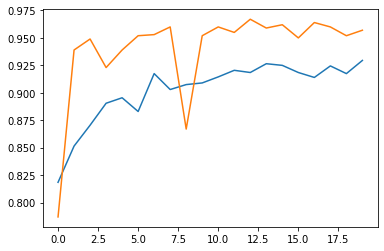

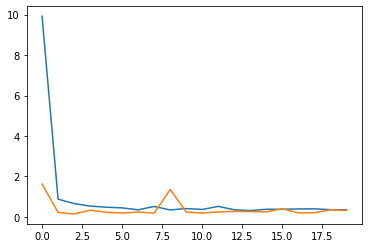

<Figure size 432x288 with 0 Axes>

In [2]:
import matplotlib.pyplot as plt

training_accuracy = history.history['accuracy']
training_loss = history.history['loss']
validation_accuracy = history.history['val_accuracy']
validation_loss = history.history['val_loss']

epochs = range(len(training_accuracy))

plt.plot(epochs, training_accuracy)
plt.plot(epochs, validation_accuracy)
plt.figure()


plt.plot(epochs, training_loss)
plt.plot(epochs, validation_loss)
plt.figure()


plt.show()